We first implement a solver function that numerically solves the exponential equation $$u'=-au$$. This function calls A that returns the coefficient for exact numerical solution so that $$u^{n}=A^nI$$.

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def solver(I, a, T, dt, theta):
    #copied from lecture notes:
    Nt = int(T / dt)  # no of time intervals
    T = Nt * dt  # adjust T to fit time step dt
    u = np.zeros(Nt + 1)  # array of u[n] values
    t = np.linspace(0, T, Nt + 1)  # time mesh
    u[0] = I  # assign initial condition

    #based on lecure notes
    A = (1 - (1 - theta) * a * dt) / (1 + theta * dt * a) #get exact numerical solution
    u[1:] = A
    u[:] = np.cumprod(u)

    return u, t 

We then run experiments with $$\theta=0,0.5,1$$ and various sizes of $$\Delta t$$. 

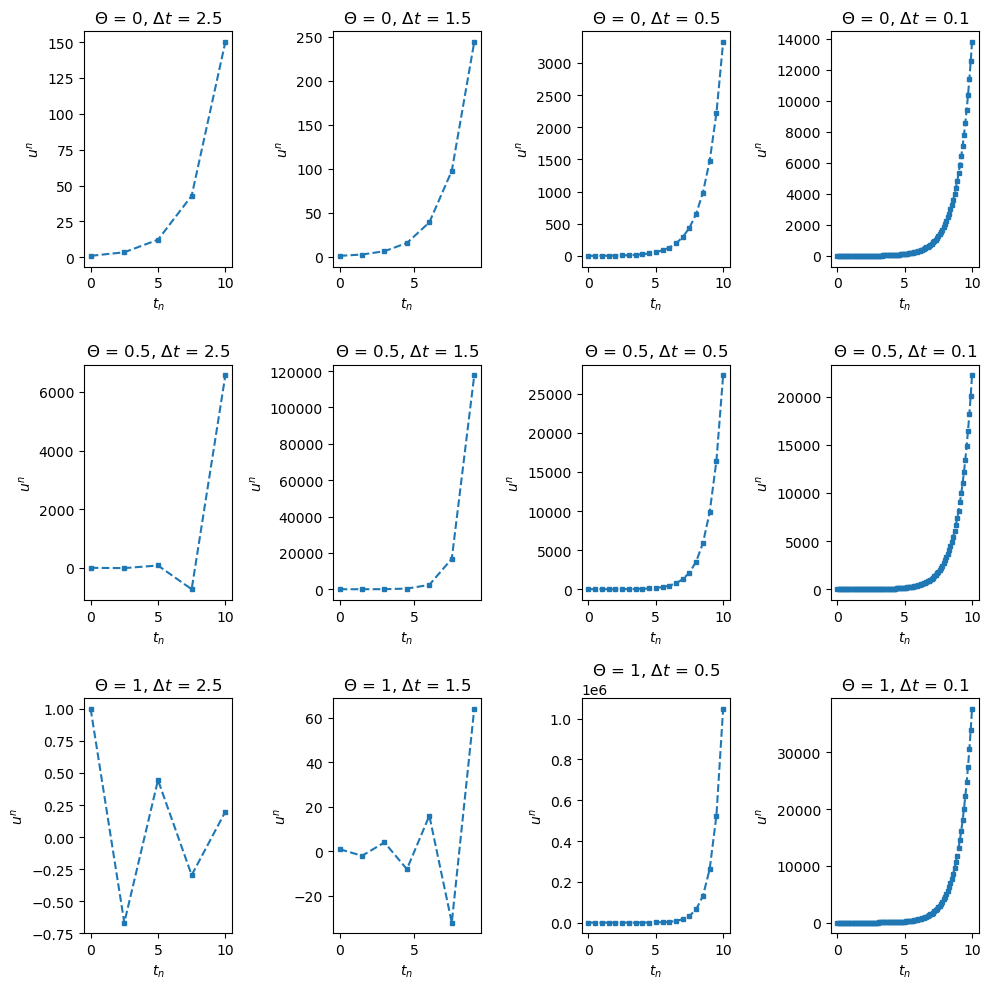

In [65]:
Theta = [0,0.5,1]
Dt = [2.5,1.5,0.5,0.1]
I = 1
a = -1
T = 10

fig, ax = plt.subplots(len(Theta),len(Dt),figsize=(10,10))

for i in range(len(Theta)):
    theta = Theta[i]
    for j in range(len(Dt)):
        dt = Dt[j]
        u,t = solver(I, a, T, dt, theta)
        ax[i,j].plot(t,u,marker='s',markersize=3,linestyle='--')
        ax[i,j].set(xlabel='$t_n$', ylabel='$u^n$', title=f'$\\Theta$ = {theta}, $\\Delta t$ = {dt}')
plt.tight_layout()
        


We see that forward Euler the shceme is stable for all time steps. For Crank&mdash;Nicholson the scheme is unstable for dt=2.5. Furthermore, for backward Euler the scheme is unstable for step lenghts 1.5 and 2.5, we also see that it does not grow for dt = 2.5.

For all three schemes we see that the growth changes for the different step lenths. For FE the growth is increased as the step length shrinks, while it varies for the two other schemes.

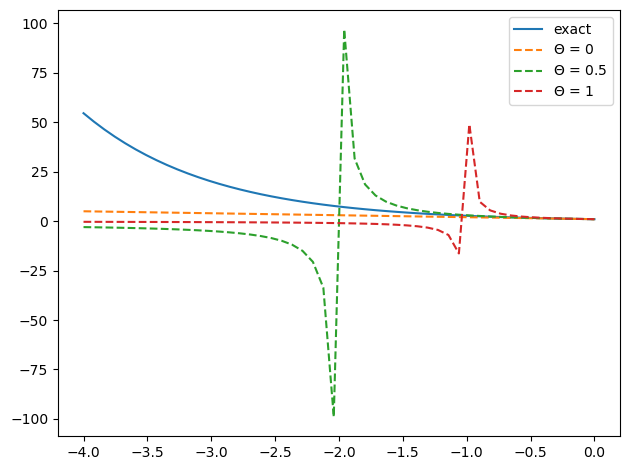

In [111]:
def A_e(p):
    return np.exp(-p)

def A_n(p,theta):
    return (1-(1-theta)*p)/(1+theta*p)

p = np.linspace(-4,0)

Theta = [0,0.5,1]
plt.plot(p,A_e(p),label='exact')

for theta in Theta:
    plt.plot(p,A_n(p,theta),label=f'$\\Theta$ = {theta}',linestyle='--')

plt.legend()
plt.tight_layout()

We see that FE is stable for all p:=a*dt<0, but much smaller than the exact amplification factor as p->-∞. We also see that CN is unstable for p around -2 and that BE is unstable around p = -1. These values align with division by 0 in the amplification factor (singularities).